In [1]:
# System
import os
import sys
sys.path.append('/home/helfrech/Tools/Toolbox/utils')
sys.path.append('..')

# Maths
import numpy as np

# Plotting
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib.patches import Patch, ConnectionPatch
from matplotlib.patches import Rectangle
from matplotlib.cm import ScalarMappable
from matplotlib.colors import Normalize, BoundaryNorm
from matplotlib.colors import ListedColormap

# ML
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.neighbors import KernelDensity
from errors import MAE
from kernels import sqeuclidean_distances

# Atoms
from ase.io import read

# Utilities
import h5py
import json
import project_utils as utils

# Import COSMO style toolkit
import cosmoplot.colorbars as cosmocbars
import cosmoplot.utils as cosmoutils
import cosmoplot.style as cosmostyle

cosmostyle.set_style('article')
color_list = cosmostyle.color_cycle

# TODO: turn plotting and classification stats into functions

# TODO: Make an argument to the functions to do the dummy DEEM classification

# TODO: Make an argument to the functions to do the full DEEM 330k classification

# TODO: don't include the 5 deem and RWY in the test sets for evaluation, but compute values for them; i.e., still pass them through the models

# Analysis setup

In [2]:
# Load SOAP cutoffs
with open('../../Processed_Data/soap_hyperparameters.json', 'r') as f:
    soap_hyperparameters = json.load(f)
    
cutoffs = soap_hyperparameters['interaction_cutoff']

In [3]:
# Load train and test indices
idxs_deem_train = np.loadtxt('../../Processed_Data/DEEM_10k/idxs_bk/train.idxs', dtype=int) ##
idxs_deem_test = np.loadtxt('../../Processed_Data/DEEM_10k/idxs_bk/test.idxs', dtype=int) ##

n_deem_train = idxs_deem_train.size
n_deem_test = idxs_deem_test.size
n_deem = n_deem_train + n_deem_test

In [4]:
idxs_iza_train = np.loadtxt('../../Processed_Data/IZA_226/idxs_bk/train.idxs', dtype=int) ##
idxs_iza_test = np.loadtxt('../../Processed_Data/IZA_226/idxs_bk/test.idxs', dtype=int) ##

In [5]:
# Load indices of DEEM 10k set in 330k
idxs_deem_10k = np.loadtxt('../../Processed_Data/DEEM_330k/deem_10k.idxs', dtype=int)

In [6]:
# Load IZA cantons
cantons_iza = np.loadtxt('../../Raw_Data/GULP/IZA_226/cantons.txt', usecols=1, dtype=int)
RWY = np.nonzero(cantons_iza == 4)[0][0]
cantons_iza = np.delete(cantons_iza, RWY)
n_iza = len(cantons_iza)

In [7]:
# Make dummy DEEM cantons
cantons_deem = np.ones(n_deem, dtype=int) * 4

In [8]:
# Build set of "master" canton labels
# TODO: make compatible with both 10k and 330k and don't hard code 330k number
cantons_train = {}
cantons_test = {}

cantons_train[4] = np.concatenate((cantons_iza[idxs_iza_train], cantons_deem[idxs_deem_train]))
#cantons_test[4] = np.concatenate((cantons_iza[idxs_iza_test], cantons_deem[idxs_deem_test]))
cantons_test[4] = np.concatenate((cantons_iza[idxs_iza_test], np.ones(331172, dtype=int) * 4)) ###

cantons_train[2] = np.concatenate((np.ones(len(idxs_iza_train), dtype=int),
                                   np.ones(len(idxs_deem_train), dtype=int) * 2))
#cantons_test[2] = np.concatenate((np.ones(len(idxs_iza_test), dtype=int),
#                                  np.ones(len(idxs_deem_test), dtype=int) * 2))
cantons_test[2] = np.concatenate((np.ones(len(idxs_iza_test), dtype=int),
                                  np.ones(331172, dtype=int) * 2)) ###

In [9]:
# Load dummy Deem cantons to test the "null" case -- i.e., the SVC shouldn't be able to classify
# a random splitting of DEEM
dummy_cantons_deem_2 = np.loadtxt('../../Processed_Data/DEEM_10k/dummy_cantons_2-class.dat')
dummy_cantons_deem_4 = np.loadtxt('../../Processed_Data/DEEM_10k/dummy_cantons_4-class.dat')
    
dummy_cantons_deem_train = {2: dummy_cantons_deem_2[idxs_deem_train],
                            4: dummy_cantons_deem_4[idxs_deem_train]}
dummy_cantons_deem_test = {2: dummy_cantons_deem_2[idxs_deem_test],
                           4: dummy_cantons_deem_4[idxs_deem_test]}

In [10]:
class_names = {}
class_names[2] = ['IZA', 'DEEM']
class_names[4] = ['IZA1', 'IZA2', 'IZA3', 'DEEM']

In [11]:
ticklabels = {2: ['IZA', 'DEEM'],
              4: ['IZA1', 'IZA2', 'IZA3', 'DEEM']}
#ticklabels = {2: ['DEEM1', 'DEEM2'],
#              4: ['DEEM1', 'DEEM2', 'DEEM3', 'DEEM4']}

# Linear Models

In [12]:
# Linear model setup
n_species = 2
group_names = {'power': ['OO', 'OSi', 'SiSi', 
                         'OO+OSi', 'OO+SiSi', 'OSi+SiSi',
                         'OO+OSi+SiSi'], 
               'radial': ['O', 'Si', 'O+Si']}

In [13]:
deem_name = 'DEEM_10k'
all_deem_name = 'DEEM_330k'
iza_name = 'IZA_226'
deem_dir = f'../../Processed_Data/{deem_name}/Data'
all_deem_dir = f'../../Processed_Data/{all_deem_name}/Data'
iza_dir = f'../../Processed_Data/{iza_name}/Data'

## Plotting

===== 3.5 | 4-Class | Power | OO =====


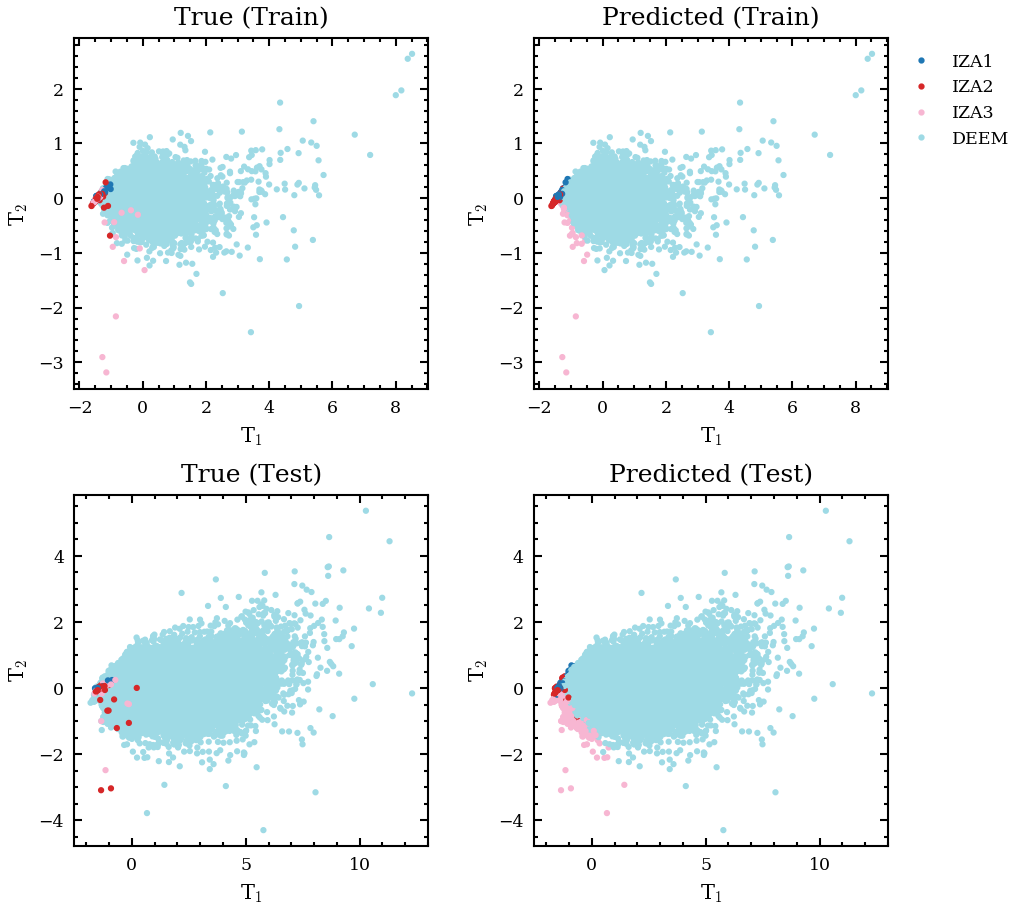

===== 3.5 | 4-Class | Power | OSi =====


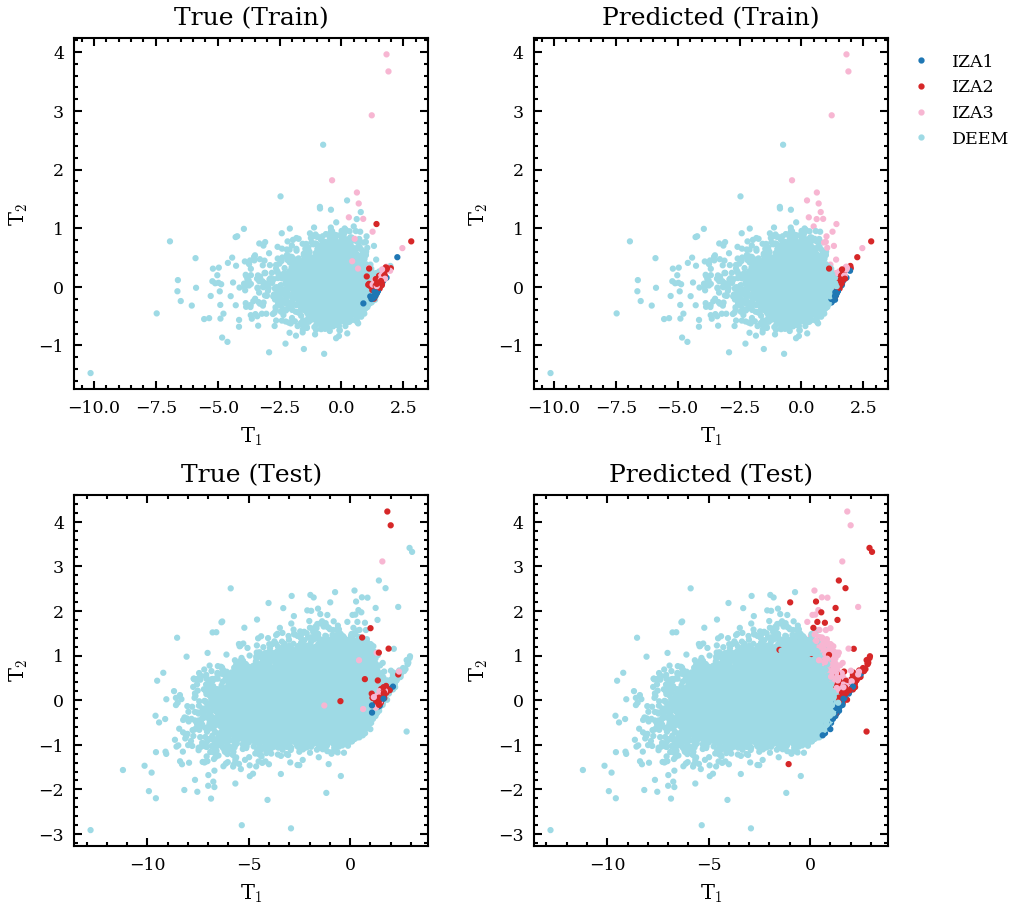

===== 3.5 | 4-Class | Power | SiSi =====


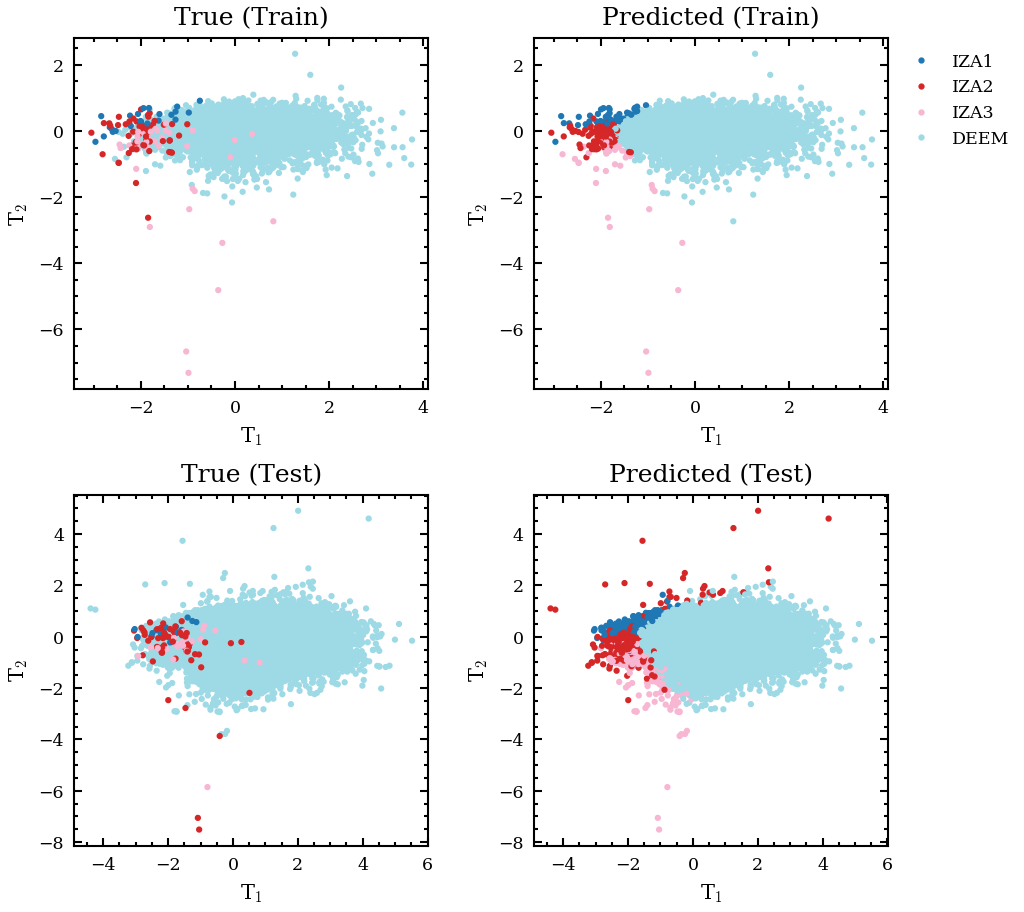

===== 3.5 | 4-Class | Power | OO+OSi =====


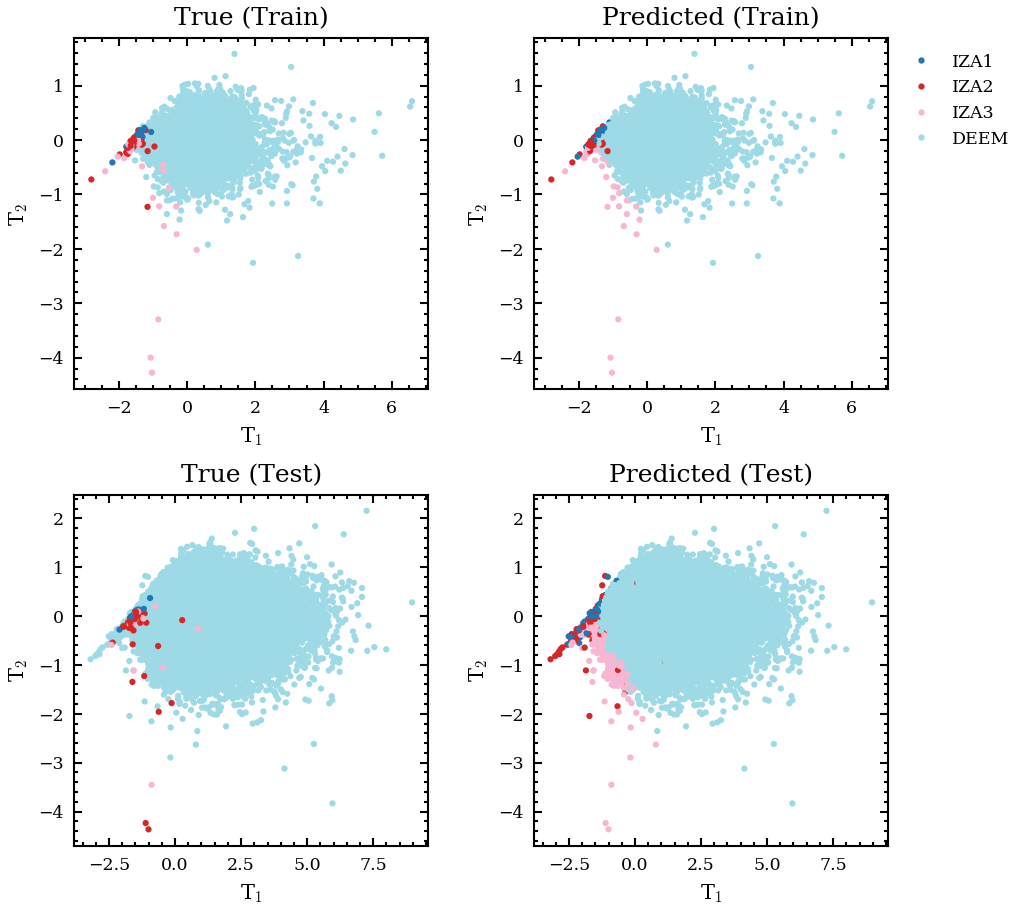

===== 3.5 | 4-Class | Power | OO+SiSi =====


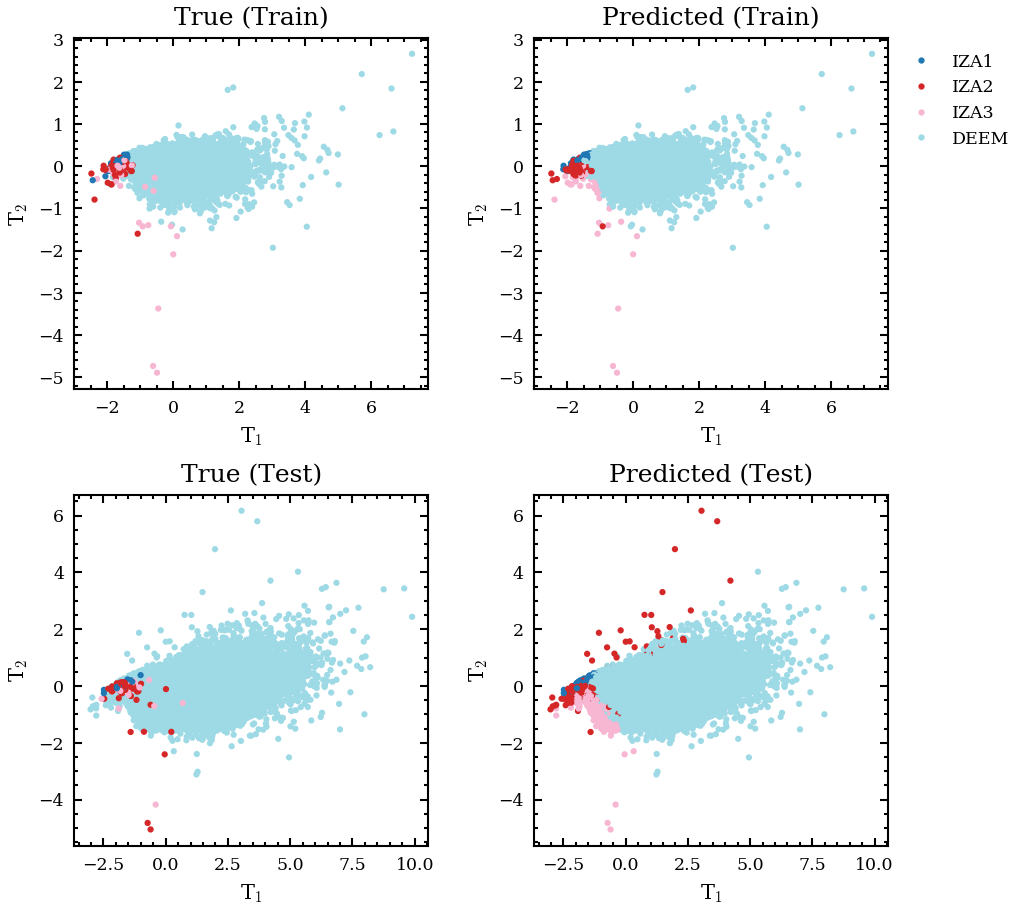

===== 3.5 | 4-Class | Power | OSi+SiSi =====


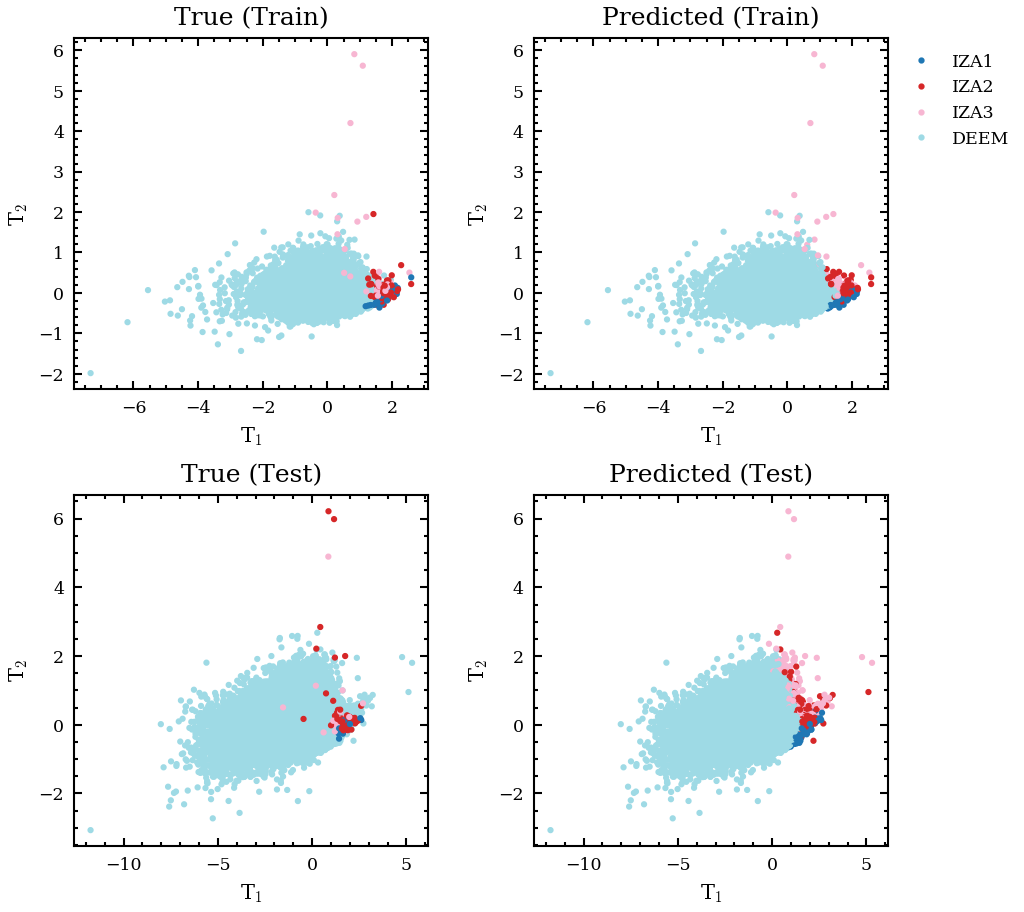

===== 3.5 | 4-Class | Power | OO+OSi+SiSi =====


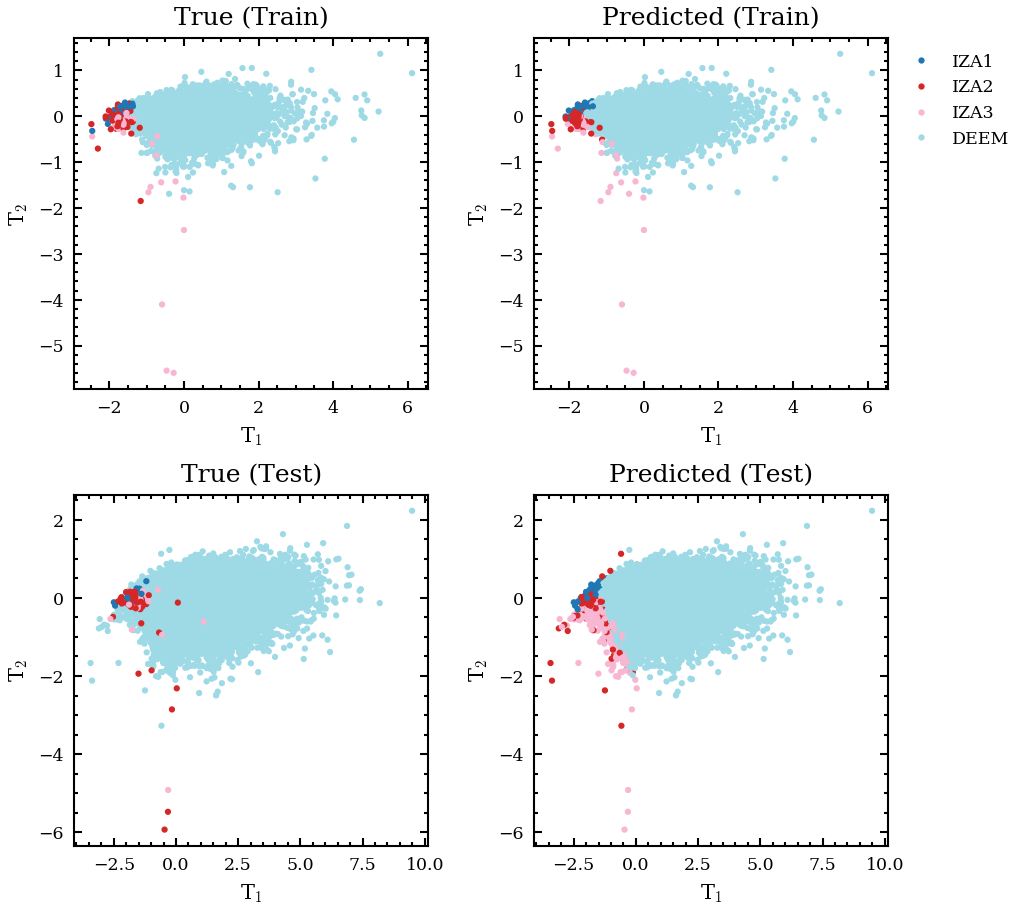

===== 3.5 | 4-Class | Radial | O =====


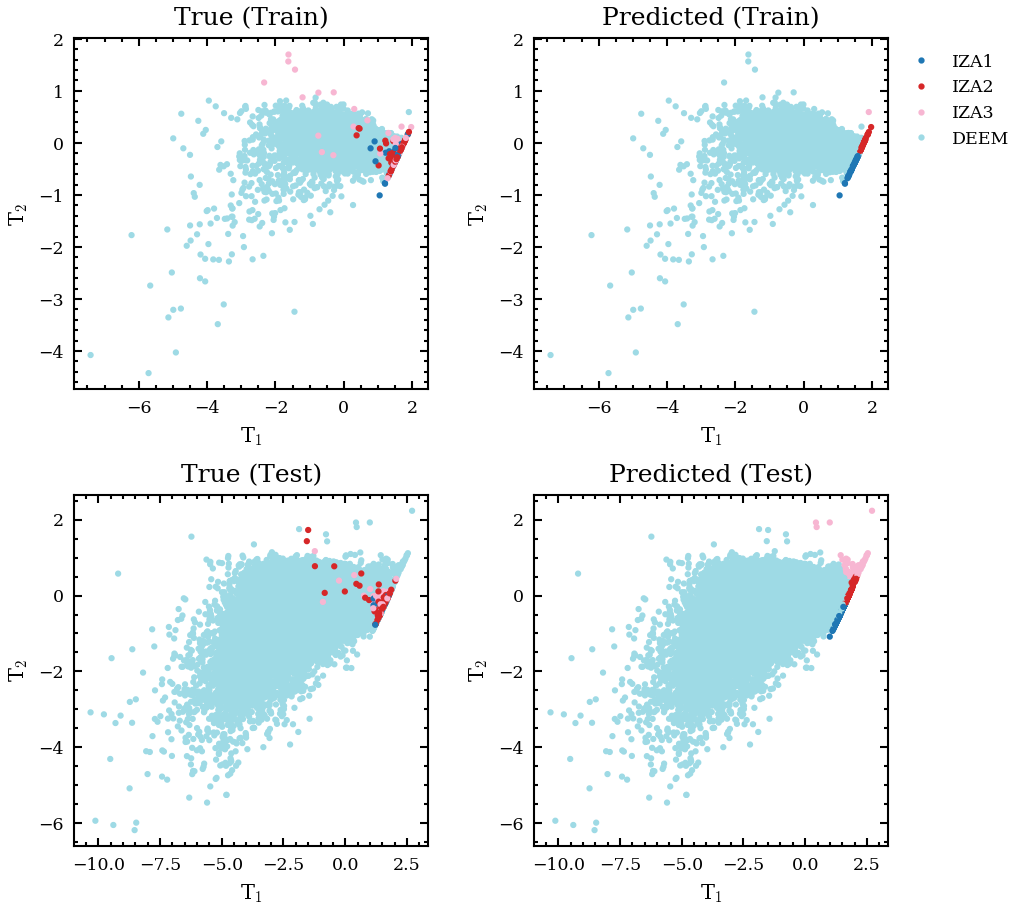

===== 3.5 | 4-Class | Radial | Si =====


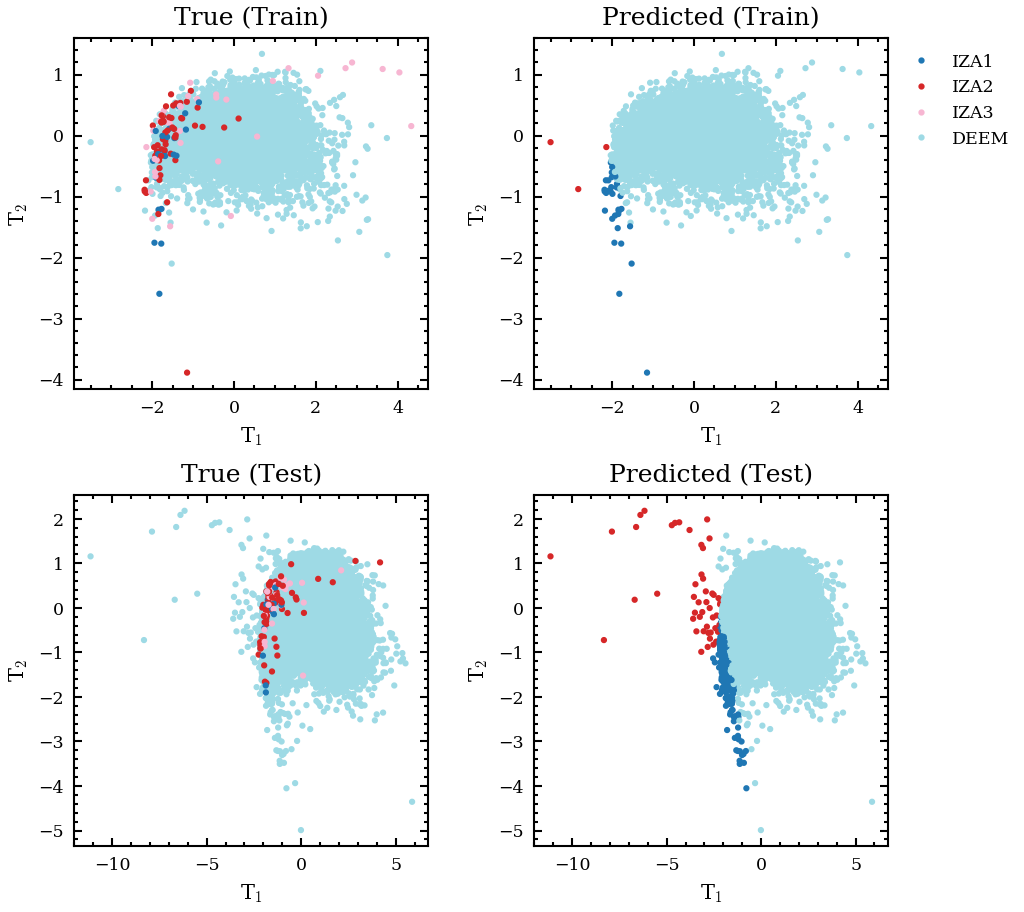

===== 3.5 | 4-Class | Radial | O+Si =====


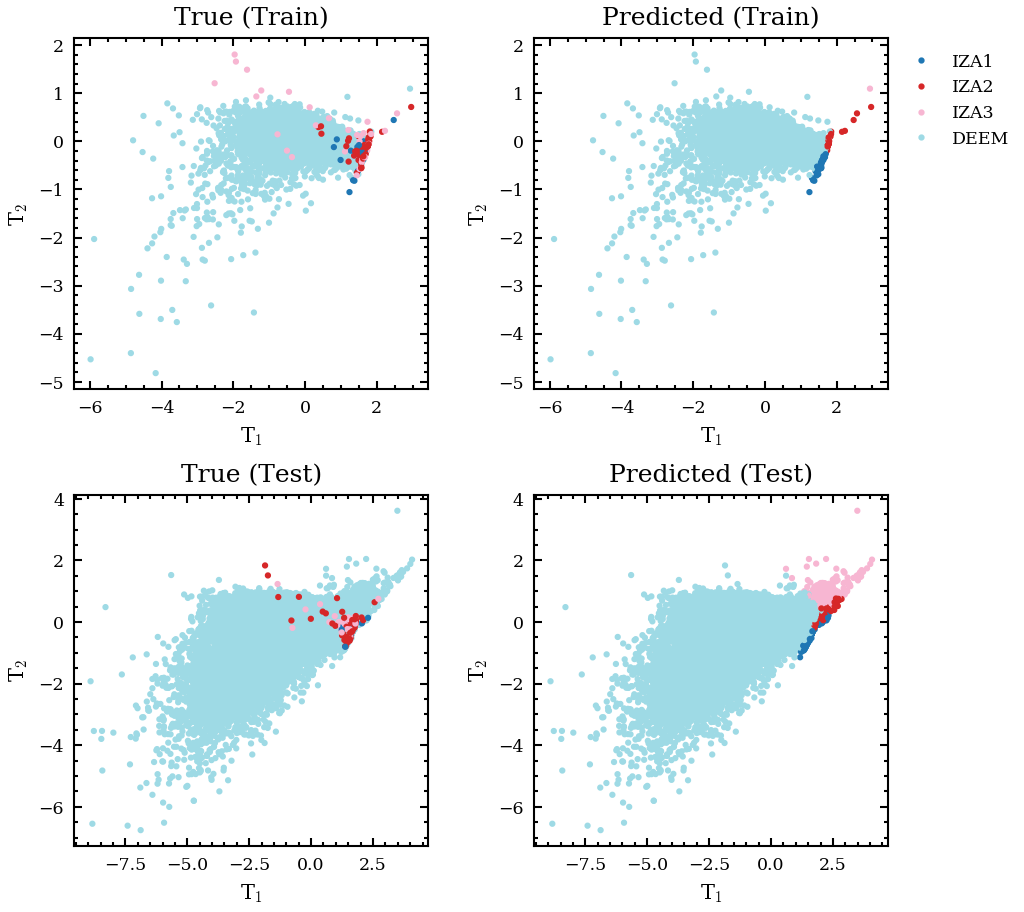

===== 6.0 | 4-Class | Power | OO =====


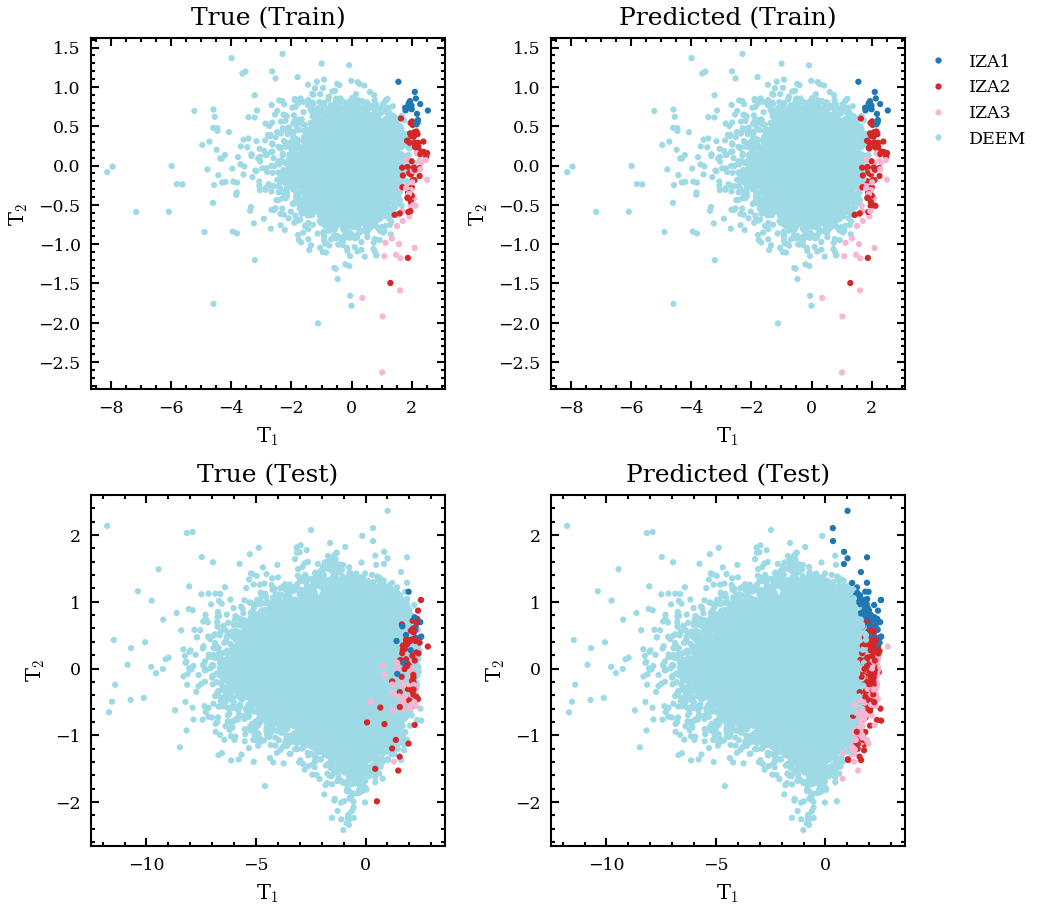

===== 6.0 | 4-Class | Power | OSi =====


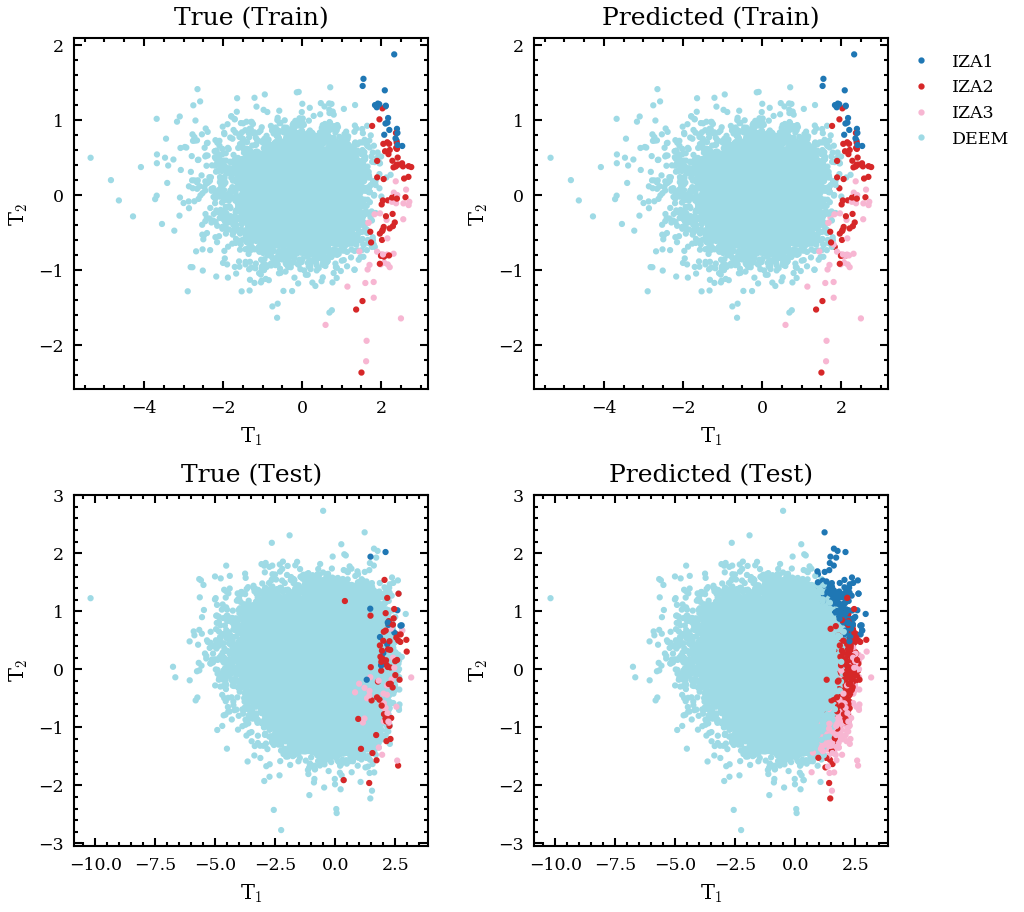

===== 6.0 | 4-Class | Power | SiSi =====


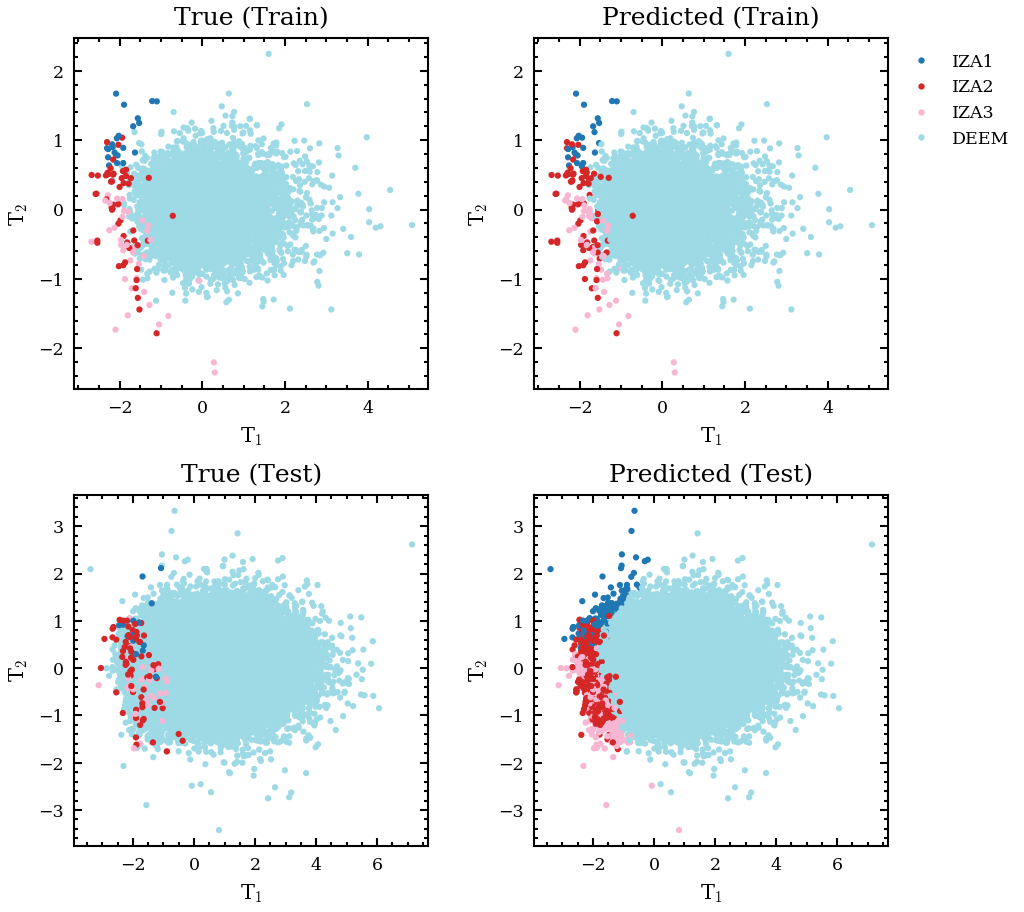

===== 6.0 | 4-Class | Power | OO+OSi =====


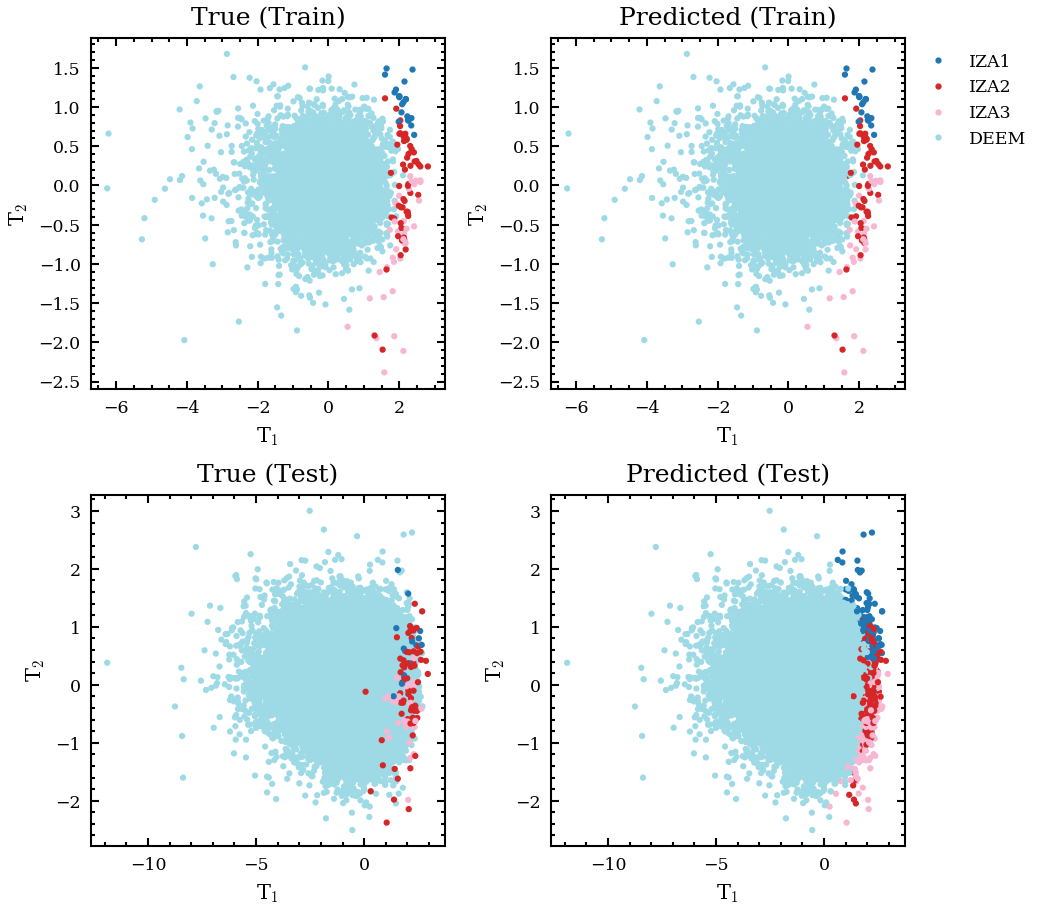

===== 6.0 | 4-Class | Power | OO+SiSi =====


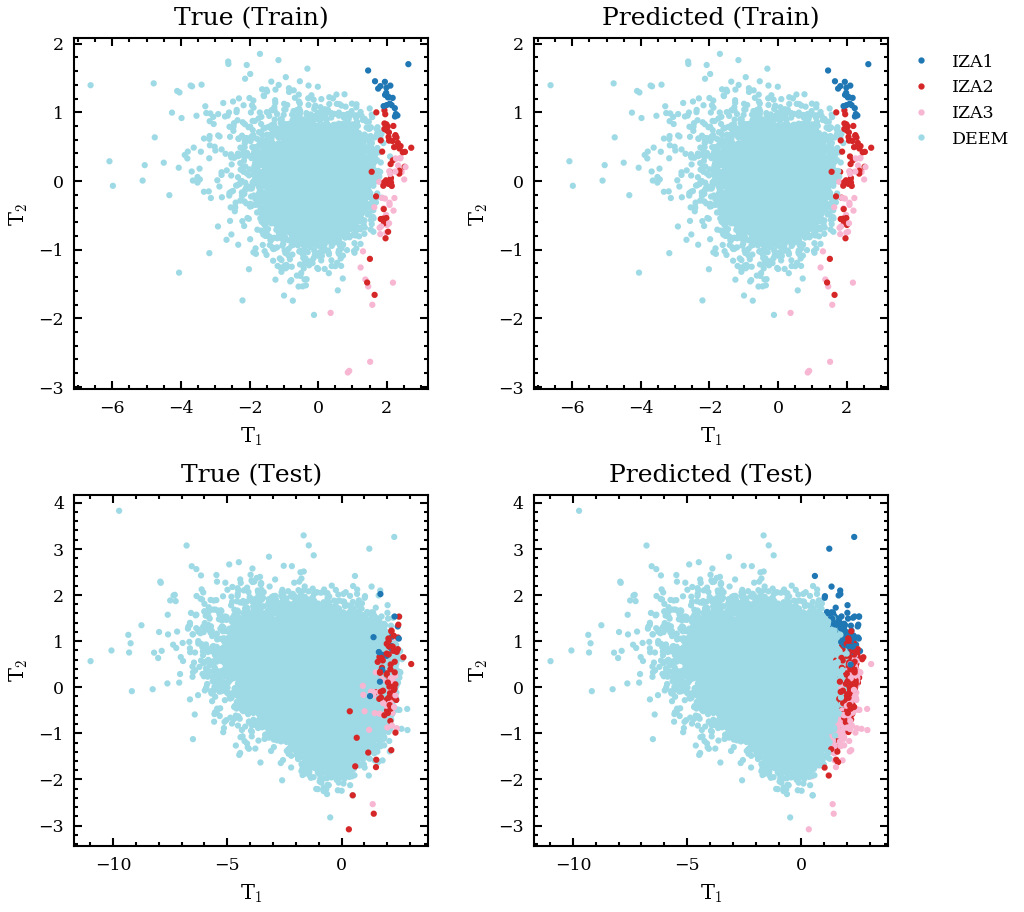

===== 6.0 | 4-Class | Power | OSi+SiSi =====


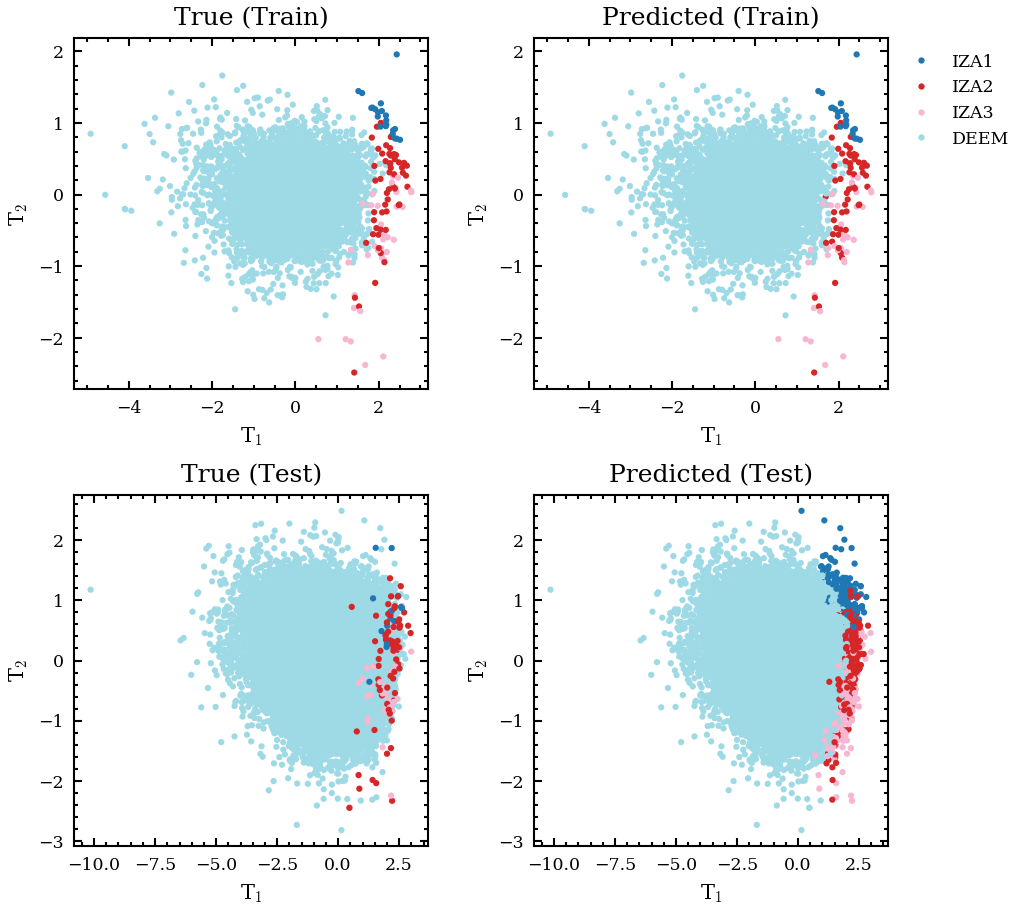

===== 6.0 | 4-Class | Power | OO+OSi+SiSi =====


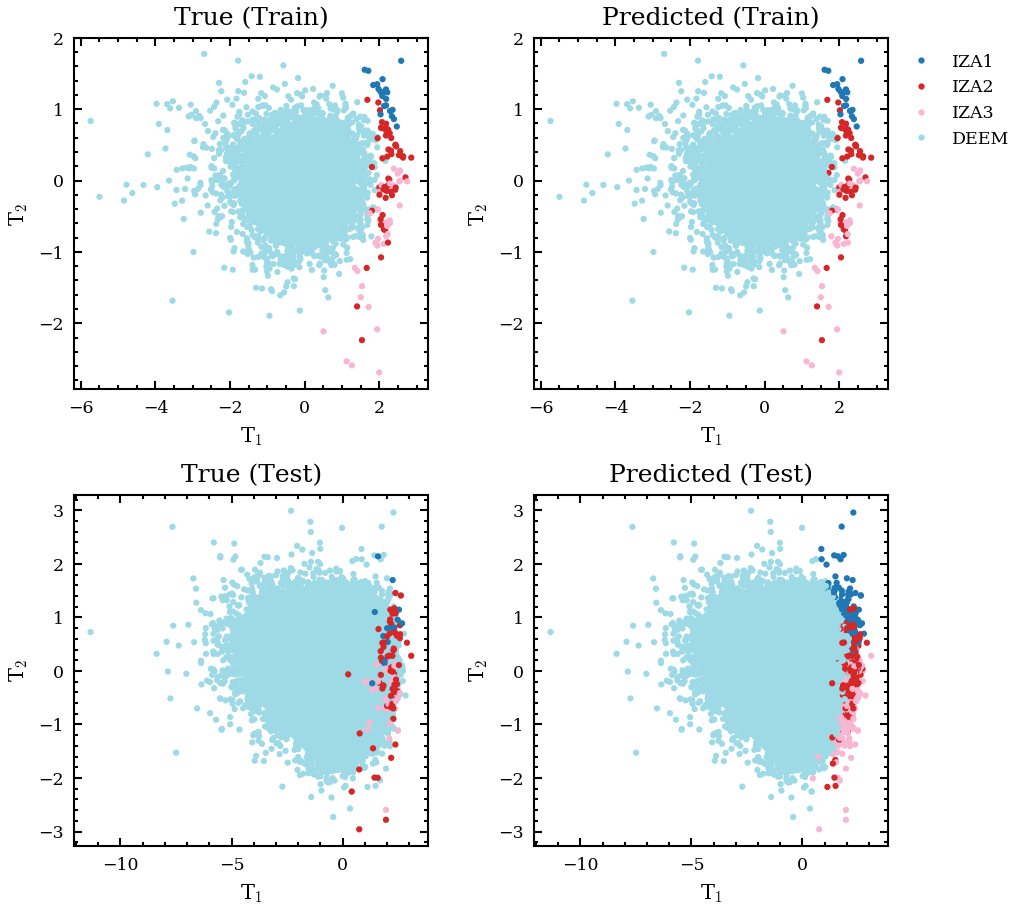

===== 6.0 | 4-Class | Radial | O =====


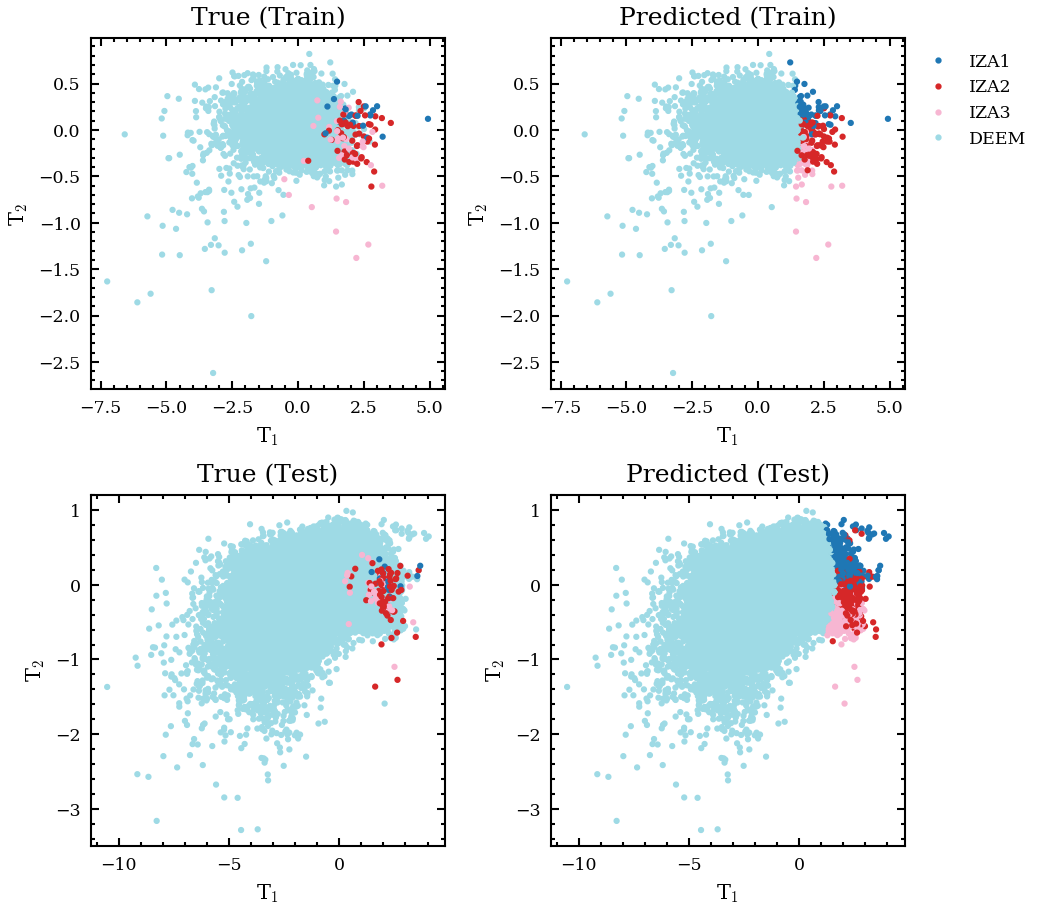

===== 6.0 | 4-Class | Radial | Si =====


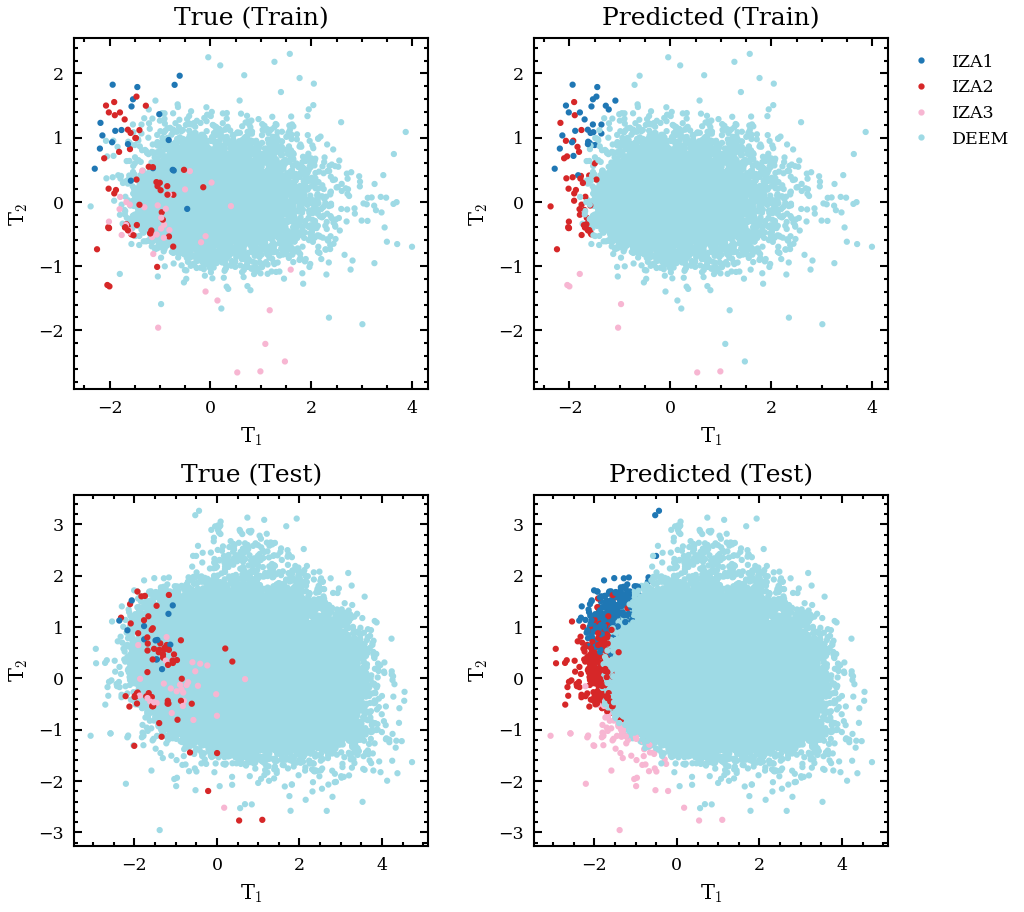

===== 6.0 | 4-Class | Radial | O+Si =====


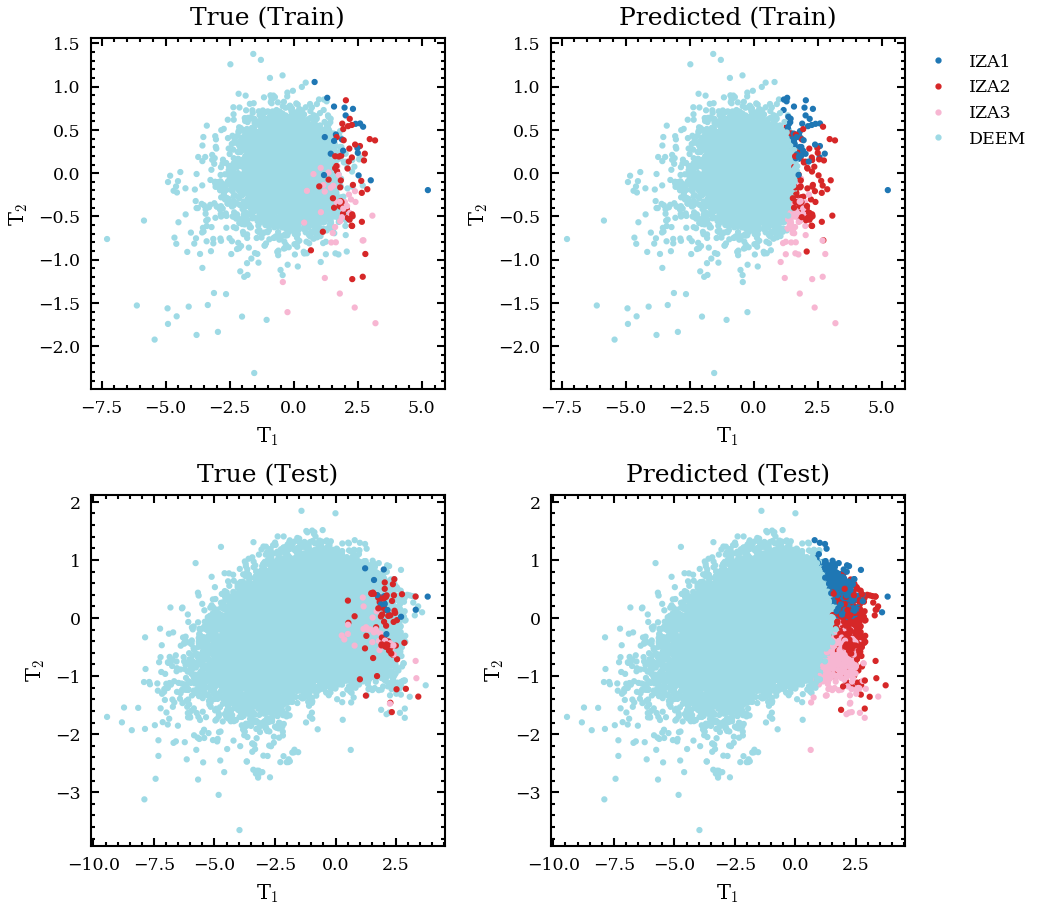

In [46]:
for cutoff in cutoffs:
    for spectrum_type in ('power', 'radial'):
        spectrum_name = spectrum_type.capitalize()
        
        for species_pairing in group_names[spectrum_type]:

            for n_cantons in [4]: #(2, 4):
                
                # Prepare outputs
                data_dir = f'Linear_Models/LSVC-LPCovR/{n_cantons}-Class/{spectrum_name}/{species_pairing}'
                output_dir = f'../../Results/{cutoff}/Linear_Models/LSVC-LPCovR/{n_cantons}-Class/{spectrum_name}/{species_pairing}'
                
                if not os.path.exists(output_dir):
                    os.makedirs(output_dir)
            
                print(f'===== {cutoff} | {n_cantons}-Class | {spectrum_name} | {species_pairing} =====')
    
                # Load projections
                deem_file = f'{deem_dir}/{cutoff}/{data_dir}/pcovr_structures.hdf5'
                T_deem = utils.load_structures_from_hdf5(deem_file, datasets=None, concatenate=True)
                
                all_deem_file = f'{all_deem_dir}/{cutoff}/{data_dir}/pcovr_structures.hdf5'
                T_all_deem = utils.load_structures_from_hdf5(all_deem_file, datasets=None, concatenate=True)
                T_all_deem = np.delete(T_all_deem, 265045, axis=0) # Messed up structure

                iza_file = f'{iza_dir}/{cutoff}/{data_dir}/pcovr_structures.hdf5'
                T_iza = utils.load_structures_from_hdf5(iza_file, datasets=None, concatenate=True)

                # Load predicted cantons
                deem_file = f'{deem_dir}/{cutoff}/{data_dir}/pcovr_structure_cantons.dat'
                predicted_cantons_deem = np.loadtxt(deem_file, dtype=int)
                
                all_deem_file = f'{all_deem_dir}/{cutoff}/{data_dir}/pcovr_structure_cantons.dat'
                predicted_cantons_all_deem = np.loadtxt(all_deem_file, dtype=int)
                predicted_cantons_all_deem = np.delete(predicted_cantons_all_deem, 265045, axis=0) # Messed up structure

                iza_file = f'{iza_dir}/{cutoff}/{data_dir}/pcovr_structure_cantons.dat'
                predicted_cantons_iza = np.loadtxt(iza_file, dtype=int)

                fig = plt.figure(figsize=(7.0, 7.0))
                axs_true_train = fig.add_subplot(2, 2, 1)
                axs_predicted_train = fig.add_subplot(2, 2, 2)
                axs_true_test = fig.add_subplot(2, 2, 3)
                axs_predicted_test = fig.add_subplot(2, 2, 4)
                scatter_opts = dict(cmap='tab20', vmin=1, vmax=4)
                df_idx = 0

                axs_true_train.scatter(T_deem[idxs_deem_train, 0], T_deem[idxs_deem_train, 1], 
                            c=cantons_deem[idxs_deem_train], zorder=2, **scatter_opts)
                axs_true_train.scatter(T_iza[idxs_iza_train, 0], T_iza[idxs_iza_train, 1], 
                            c=cantons_iza[idxs_iza_train], zorder=3, **scatter_opts)

                axs_predicted_train.scatter(T_deem[idxs_deem_train, 0], T_deem[idxs_deem_train, 1], 
                            #c=df_deem_train[:, df_idx], zorder=2, **scatter_opts)
                            c=predicted_cantons_deem[idxs_deem_train], zorder=2, **scatter_opts)
                axs_predicted_train.scatter(T_iza[idxs_iza_train, 0], T_iza[idxs_iza_train, 1], 
                            #c=df_iza_train[:, df_idx], zorder=3, **scatter_opts)
                            c=predicted_cantons_iza[idxs_iza_train], zorder=3, **scatter_opts)

#                 axs_true_test.scatter(T_deem[idxs_deem_test, 0], T_deem[idxs_deem_test, 1],
#                         c=cantons_deem[idxs_deem_test], zorder=2, **scatter_opts)
                axs_true_test.scatter(T_all_deem[:, 0], T_all_deem[:, 1],
                        c=np.ones(len(T_all_deem))*4, zorder=2, **scatter_opts)
                axs_true_test.scatter(T_iza[idxs_iza_test, 0], T_iza[idxs_iza_test, 1],
                        c=cantons_iza[idxs_iza_test], zorder=3, **scatter_opts)

#                 axs_predicted_test.scatter(T_deem[idxs_deem_test, 0], T_deem[idxs_deem_test, 1],
#                         #c=df_deem_test[:, df_idx])
#                         c=predicted_cantons_deem[idxs_deem_test], zorder=2, **scatter_opts)
                axs_predicted_test.scatter(T_all_deem[:, 0], T_all_deem[:, 1],
                        #c=df_deem_test[:, df_idx], zorder=2, **scatter_opts)
                        c=predicted_cantons_all_deem, zorder=2, **scatter_opts)
                axs_predicted_test.scatter(T_iza[idxs_iza_test, 0], T_iza[idxs_iza_test, 1],
                        #c=df_iza_test[:, df_idx], zorder=3, **scatter_opts)
                        c=predicted_cantons_iza[idxs_iza_test], zorder=3, **scatter_opts)

                handles = [Line2D([0], [0], c=plt.get_cmap('tab20')(0.0), marker='o', linewidth=0),
                           Line2D([0], [0], c=plt.get_cmap('tab20')(0.33), marker='o', linewidth=0),
                           Line2D([0], [0], c=plt.get_cmap('tab20')(0.67), marker='o', linewidth=0),
                           Line2D([0], [0], c=plt.get_cmap('tab20')(1.0), marker='o', linewidth=0)]

                labels = ['IZA1', 'IZA2', 'IZA3', 'DEEM']
                axs_predicted_train.legend(handles=handles, labels=labels, 
                                           loc='upper left', bbox_to_anchor=(1.0, 1.0))

                for ax in (axs_true_train, axs_predicted_train, axs_true_test, axs_predicted_test):
                    ax.set_xlabel(r'T$_1$')
                    ax.set_ylabel(r'T$_2$')

                axs_true_train.set_title('True (Train)')
                axs_predicted_train.set_title('Predicted (Train)')
                axs_true_test.set_title('True (Test)')
                axs_predicted_test.set_title('Predicted (Test)')

                fig.subplots_adjust(wspace=0.3, hspace=0.3)

                #fig.savefig(f'{output_dir}/svm-kpcovr.png', bbox_inches='tight')

                plt.show()

## Classification statistics

In [49]:
for cutoff in cutoffs:
    for spectrum_type in ('power', 'radial'):
        spectrum_name = spectrum_type.capitalize()
        
        for species_pairing in group_names[spectrum_type]:

            for n_cantons in (2, 4):
                
                # Prepare outputs
                data_dir = f'Linear_Models/LSVC-LPCovR/{n_cantons}-Class/{spectrum_name}/{species_pairing}'
            
                print(f'===== {cutoff} | {n_cantons}-Class | {spectrum_name} | {species_pairing} =====')            
                
                predicted_cantons_iza = \
                    np.loadtxt(f'{iza_dir}/{cutoff}/{data_dir}/pcovr_structure_cantons.dat', dtype=int)
#                 predicted_cantons_deem = \
#                     np.loadtxt(f'{deem_dir}/{cutoff}/{data_dir}/pcovr_structure_cantons.dat', dtype=int)
                predicted_cantons_deem = \
                    np.loadtxt(f'{all_deem_dir}/{cutoff}/{data_dir}/svc_structure_cantons.dat', dtype=int)

                predicted_cantons_train = np.concatenate((predicted_cantons_iza[idxs_iza_train],
                                                          predicted_cantons_deem[idxs_deem_train]))
#                 predicted_cantons_test = np.concatenate((predicted_cantons_iza[idxs_iza_test],
#                                                          predicted_cantons_deem[idxs_deem_test]))
                predicted_cantons_test = np.concatenate((predicted_cantons_iza[idxs_iza_test],
                                                         predicted_cantons_deem))

                dfs_svc_iza = np.loadtxt(f'{iza_dir}/{cutoff}/{data_dir}/svc_structure_dfs.dat')
                dfs_svc_deem = np.loadtxt(f'{deem_dir}/{cutoff}/{data_dir}/svc_structure_dfs.dat')

                dfs_pcovr_iza = np.loadtxt(f'{iza_dir}/{cutoff}/{data_dir}/pcovr_structure_dfs.dat')
                dfs_pcovr_deem = np.loadtxt(f'{deem_dir}/{cutoff}/{data_dir}/pcovr_structure_dfs.dat')

                dfs_svc_train = np.concatenate((dfs_svc_iza[idxs_iza_train],
                                                dfs_svc_deem[idxs_deem_train]))
                dfs_svc_test = np.concatenate((dfs_svc_iza[idxs_iza_test],
                                               dfs_svc_deem[idxs_deem_test]))

                dfs_pcovr_train = np.concatenate((dfs_pcovr_iza[idxs_iza_train],
                                                  dfs_pcovr_deem[idxs_deem_train]))
                dfs_pcovr_test = np.concatenate((dfs_pcovr_iza[idxs_iza_test],
                                                 dfs_pcovr_deem[idxs_deem_test]))

                matrix_train = confusion_matrix(cantons_train[n_cantons], predicted_cantons_train)
                matrix_test = confusion_matrix(cantons_test[n_cantons], predicted_cantons_test)

                print('----- Train -----')
                print(classification_report(cantons_train[n_cantons], predicted_cantons_train,
                                            zero_division=0))
                print('Train accuracy:', np.sum(np.diag(matrix_train)) / np.sum(matrix_train))
                print()
                print(matrix_train)
                print()
                print('Train DF MAE:', MAE(dfs_svc_train, dfs_pcovr_train))
                print()

                print('----- Test -----')
                print(classification_report(cantons_test[n_cantons], predicted_cantons_test,
                                            zero_division=0))
                print('Test accuracy:', np.sum(np.diag(matrix_test)) / np.sum(matrix_test))
                print()
                print(matrix_test)
                print()
                print('Test DF MAE:', MAE(dfs_svc_test, dfs_pcovr_test))
                print()

===== 3.5 | 2-Class | Power | OO =====
----- Train -----
              precision    recall  f1-score   support

           1       0.21      0.97      0.35       112
           2       1.00      0.95      0.97      7750

    accuracy                           0.95      7862
   macro avg       0.61      0.96      0.66      7862
weighted avg       0.99      0.95      0.96      7862

Train accuracy: 0.9479776138387179

[[ 109    3]
 [ 406 7344]]

Train DF MAE: 2.4200714356397857

----- Test -----
              precision    recall  f1-score   support

           1       0.00      0.91      0.01       113
           2       1.00      0.90      0.94    331172

    accuracy                           0.90    331285
   macro avg       0.50      0.90      0.48    331285
weighted avg       1.00      0.90      0.94    331285

Test accuracy: 0.8951325897641004

[[   103     10]
 [ 34731 296441]]

Test DF MAE: 2.378032673719848

===== 3.5 | 4-Class | Power | OO =====
----- Train -----
              

              precision    recall  f1-score   support

           1       0.00      0.50      0.01        14
           2       0.01      0.41      0.01        68
           3       0.01      0.39      0.01        31
           4       1.00      0.97      0.99    331172

    accuracy                           0.97    331285
   macro avg       0.25      0.57      0.25    331285
weighted avg       1.00      0.97      0.99    331285

Test accuracy: 0.9723138687233047

[[     7      1      1      5]
 [    13     28     18      9]
 [     4      7     12      8]
 [  2223   5269   1614 322066]]

Test DF MAE: [8.06958764 6.91880243 4.39434034 2.20677752]

===== 3.5 | 2-Class | Power | OO+SiSi =====
----- Train -----
              precision    recall  f1-score   support

           1       0.28      0.99      0.43       112
           2       1.00      0.96      0.98      7750

    accuracy                           0.96      7862
   macro avg       0.64      0.98      0.71      7862
weighted a

----- Train -----
              precision    recall  f1-score   support

           1       0.26      0.48      0.33        21
           2       0.50      0.31      0.39        54
           3       0.00      0.00      0.00        37
           4       0.99      1.00      1.00      7750

    accuracy                           0.99      7862
   macro avg       0.44      0.45      0.43      7862
weighted avg       0.98      0.99      0.99      7862

Train accuracy: 0.9874077842788095

[[  10    1    0   10]
 [  15   17    0   22]
 [   7    9    0   21]
 [   7    7    0 7736]]

Train DF MAE: [2.31971729 1.73632687 0.78489479 1.01556142]

----- Test -----


/home/helfrech/ENVIRONMENTS/ZEOLITES/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1268: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           1       0.00      0.29      0.00        14
           2       0.01      0.28      0.03        68
           3       0.00      0.00      0.00        31
           4       1.00      0.99      0.99    331172

    accuracy                           0.99    331285
   macro avg       0.25      0.39      0.26    331285
weighted avg       1.00      0.99      0.99    331285

Test accuracy: 0.9881612508866988

[[     4      3      0      7]
 [    15     19      0     34]
 [     4      8      0     19]
 [  2534   1249     49 327340]]

Test DF MAE: [2.28960714 1.71534487 0.78373007 1.02230674]

===== 3.5 | 2-Class | Radial | Si =====
----- Train -----
              precision    recall  f1-score   support

           1       0.15      0.85      0.26       112
           2       1.00      0.93      0.96      7750

    accuracy                           0.93      7862
   macro avg       0.58      0.89      0.61      7862
weighted avg  

----- Train -----
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        21
           2       0.90      0.96      0.93        54
           3       0.90      0.97      0.94        37
           4       1.00      1.00      1.00      7750

    accuracy                           1.00      7862
   macro avg       0.95      0.98      0.97      7862
weighted avg       1.00      1.00      1.00      7862

Train accuracy: 0.9987280590180616

[[  21    0    0    0]
 [   0   52    2    0]
 [   0    1   36    0]
 [   0    5    2 7743]]

Train DF MAE: [6.57824876 7.11456776 5.54403684 3.90337176]

----- Test -----
              precision    recall  f1-score   support

           1       0.02      0.43      0.04        14
           2       0.04      0.51      0.08        68
           3       0.02      0.52      0.04        31
           4       1.00      0.99      1.00    331172

    accuracy                           0.99    331285
   macro avg 

----- Train -----
              precision    recall  f1-score   support

           1       0.83      1.00      0.91       112
           2       1.00      1.00      1.00      7750

    accuracy                           1.00      7862
   macro avg       0.91      1.00      0.95      7862
weighted avg       1.00      1.00      1.00      7862

Train accuracy: 0.9970745357415416

[[ 112    0]
 [  23 7727]]

Train DF MAE: 5.527927592597304

----- Test -----
              precision    recall  f1-score   support

           1       0.03      0.82      0.06       113
           2       1.00      0.99      1.00    331172

    accuracy                           0.99    331285
   macro avg       0.52      0.91      0.53    331285
weighted avg       1.00      0.99      1.00    331285

Test accuracy: 0.9914605249256683

[[    93     20]
 [  2809 328363]]

Test DF MAE: 5.365208008463817

===== 6.0 | 4-Class | Power | OSi+SiSi =====
----- Train -----
              precision    recall  f1-score   su

              precision    recall  f1-score   support

           1       0.01      0.36      0.02        14
           2       0.03      0.32      0.06        68
           3       0.01      0.03      0.02        31
           4       1.00      1.00      1.00    331172

    accuracy                           1.00    331285
   macro avg       0.26      0.43      0.27    331285
weighted avg       1.00      1.00      1.00    331285

Test accuracy: 0.9963807597687792

[[     5      1      0      8]
 [     9     22      6     31]
 [     0      6      1     24]
 [   397    645     72 330058]]

Test DF MAE: [1.35033936 1.32187191 0.9486902  1.06803958]

===== 6.0 | 2-Class | Radial | O+Si =====
----- Train -----
              precision    recall  f1-score   support

           1       0.19      0.91      0.32       112
           2       1.00      0.94      0.97      7750

    accuracy                           0.94      7862
   macro avg       0.60      0.93      0.64      7862
weighted avg